## Using Crypto Currency Data from [link](https://pythonprogramming.net/static/downloads/machine-learning-data/crypto_data.zip)

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import  datetime
import time

In [2]:
BTC_Path = "data/crypto_data/BTC-USD.csv"

df = pd.read_csv(BTC_Path,names=['time', 'low', 'high', 'open', 'close', 'volume'])

In [3]:
# 6 Columns and 97724 Entries 
df.shape

(97724, 6)

In [4]:
# Find Structure of DF 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97724 entries, 0 to 97723
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    97724 non-null  int64  
 1   low     97724 non-null  float64
 2   high    97724 non-null  float64
 3   open    97724 non-null  float64
 4   close   97724 non-null  float64
 5   volume  97724 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.5 MB


In [5]:
# Find Details of Dataframe 
df.describe()

,time,low,high,open,close,volume
count,9.772400e+04,97724.000000,97724.000000,97724.000000,97724.000000,97724.000000
mean,1.531994e+09,6771.924414,6775.026861,6773.515356,6773.521546,6.026660
std,1.812122e+06,641.329630,641.386880,641.351570,641.354134,16.640351
min,1.528969e+09,5777.000000,5787.259766,5781.609863,5778.109863,0.001915
25%,1.530441e+09,6340.000000,6342.987671,6341.479980,6341.470215,0.824953
50%,1.531906e+09,6535.000000,6538.000000,6536.395019,6536.375000,2.008043
75%,1.533428e+09,7283.254883,7290.000000,7286.852539,7286.490112,4.967114
max,1.535215e+09,8477.910156,8488.000000,8482.809570,8482.799805,801.442993


In [6]:
'''
Column Descriptions : 

#low    - Low is the lowest price of the stock during a Trading period.

#high   - High is the highest price at which a stock traded during a Trading period

#open   - Open means the price at which a stock started trading during start of Trading Period 

#close  - Close refers to the price of an individual stock at the end of Trading Period 

#volume - Volume is the total number of stock traded in over a Trading period

'''

df.columns

Index(['time', 'low', 'high', 'open', 'close', 'volume'], dtype='object')

In [7]:
#We can see that the dataset has information for every minute 
pd.to_datetime(df['time'],unit='s')

0       2018-06-14 09:31:00
1       2018-06-14 09:32:00
2       2018-06-14 09:33:00
3       2018-06-14 09:34:00
4       2018-06-14 09:35:00
                ...        
97719   2018-08-25 16:36:00
97720   2018-08-25 16:37:00
97721   2018-08-25 16:38:00
97722   2018-08-25 16:39:00
97723   2018-08-25 16:40:00
Name: time, Length: 97724, dtype: datetime64[ns]

In [8]:
# Data Cleaning 
df.isna().sum()

time      0
low       0
high      0
open      0
close     0
volume    0
dtype: int64

### Preprocessing Data for Training 
###### We will focus on closing prices only for this stage 

In [9]:
btc_close = df[['time','close']].copy()

In [10]:
btc_close.head()

,time,close
0,1528968660,6489.549805
1,1528968720,6487.379883
2,1528968780,6479.410156
3,1528968840,6479.410156
4,1528968900,6479.979980


<AxesSubplot:xlabel='time', ylabel='close'>

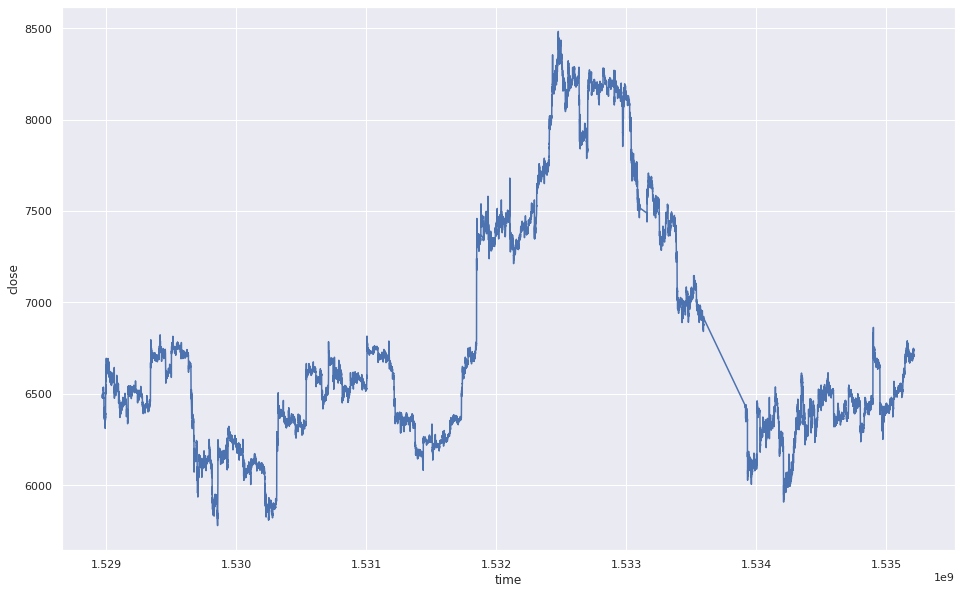

In [11]:
plt.figure(figsize=(16,10))
sns.lineplot(data=btc_close,x="time",y="close")

In [12]:
# Normalize Close Prices 
btc_close['close_normalized'] = (btc_close['close'] - btc_close['close'].mean() ) / btc_close['close'].std()

<AxesSubplot:xlabel='time', ylabel='close_normalized'>

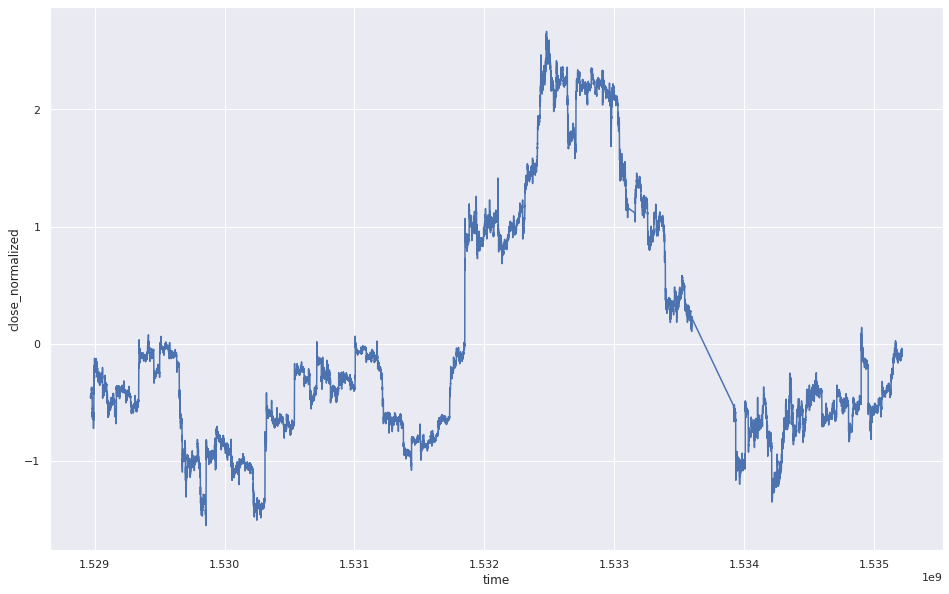

In [13]:
plt.figure(figsize=(16,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=btc_close,x="time",y="close_normalized")

In [14]:
# Split the DF into train,validation and test with 80:10:30 split


train_size = int(len(btc_close) * 0.80)
test_size = len(btc_close) - train_size


df_train = btc_close.iloc[0:train_size, 2]

df_test = btc_close.iloc[train_size:len(btc_close), 2]


In [15]:
# Shape of Datasets 
print("----")
print(f"Shape of X_train is {df_train.shape}")
print(f"Shape of X_test is {df_test.shape}")
print("----")

# NP Array of X_train and X_test
X_train = np.array(df_train)
X_test = np.array(df_test)


----
Shape of X_train is (78179,)
Shape of X_test is (19545,)
----


In [16]:
TIME_STEP = 10

LSTM_Units = 128
Dense_Units = 128

Number_LSTM_Layers = 1 # Plus One More with no return_sequences = True
Number_Dense_Layers  = 1 # Plus One More with Dense_Units =  Dense_Units/2 

Model_Name = f"BTC_RNN_Timestep_{TIME_STEP}_{Number_LSTM_Layers}_LayersWith_LSTM_Units_{LSTM_Units}_{Number_Dense_Layers}_DenseWith_Dense_Units_{Dense_Units}_{time.time()}"
Model_Name

'BTC_RNN_Timestep_10_1_LayersWith_LSTM_Units_128_1_DenseWith_Dense_Units_128_1638147274.9885845'

In [17]:

X_Rnn_train = []
y_Rnn_train = []

for i in range(TIME_STEP, X_train.shape[0]):
    X_Rnn_train.append(X_train[i-TIME_STEP:i])
    y_Rnn_train.append(X_train[i])
    
X_Rnn_train, y_Rnn_train = np.array(X_Rnn_train), np.array(y_Rnn_train)

X_Rnn_train = np.reshape(X_Rnn_train,(X_Rnn_train.shape[0],X_Rnn_train.shape[1],1))

In [18]:
print("----")
print(f"Shape of X_train is {X_Rnn_train.shape}")
print(f"Shape of y_train is {y_Rnn_train.shape}")
print("----")

----
Shape of X_train is (78169, 10, 1)
Shape of y_train is (78169,)
----


In [19]:
from tensorflow.keras.layers import Input,Dense,LSTM,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

# Model Structure Defintion
Rnn_model = Sequential()

Rnn_model.add(Input(shape=(X_Rnn_train.shape[1],X_Rnn_train.shape[2])))

for i in range(Number_LSTM_Layers):
    Rnn_model.add(LSTM(units = LSTM_Units, activation = "relu", return_sequences=True))
    Rnn_model.add(Dropout(0.2))

Rnn_model.add(LSTM(units = LSTM_Units, activation = "relu"))
Rnn_model.add(Dropout(0.2))


for i in range(Number_Dense_Layers):
    Rnn_model.add(Dense(Dense_Units,activation="relu"))
    Rnn_model.add(Dropout(0.2))

Rnn_model.add(Dense(Dense_Units/2,activation="relu"))
Rnn_model.add(Dropout(0.2))

Rnn_model.add(Dense(1))

In [20]:
Rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f"./logs/{Model_Name}")

Rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ["accuracy"])

Rnn_model.fit(X_Rnn_train, y_Rnn_train, epochs = 10, batch_size = 64,callbacks=[tensorboard_callback])

Epoch 1/10
1222/1222 [==============================] - 54s 42ms/step - loss: 0.0343 - accuracy: 0.0000e+00
Epoch 2/10
1222/1222 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.0000e+ - 53s 44ms/step - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 3/10
1222/1222 [==============================] - 54s 44ms/step - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 4/10
1222/1222 [==============================] - 53s 44ms/step - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 5/10
1222/1222 [==============================] - 54s 44ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6/10
1222/1222 [==============================] - 53s 43ms/step - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 7/10
1222/1222 [==============================] - 53s 44ms/step - loss: 0.0141 - accuracy: 0.0000e+00
Epoch 8/10
1222/1222 [==============================] - 54s 44ms/step - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 9/10
1222/1222 [==============================] - 54s 44ms/step - loss: 0.0137 - acc

In [22]:
Rnn_model.summary()
Rnn_model.save(filepath = f"./models/{Model_Name}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/ --bind_all

In [24]:
X_Rnn_test = []
y_Rnn_test = []

for i in range(TIME_STEP, X_test.shape[0]):
    X_Rnn_test.append(X_test[i-TIME_STEP:i])
    y_Rnn_test.append(X_test[i])
    
X_Rnn_test, y_Rnn_test = np.array(X_Rnn_test), np.array(y_Rnn_test)

X_Rnn_test = np.reshape(X_Rnn_test,(X_Rnn_test.shape[0],X_Rnn_test.shape[1],1))

In [25]:
print("----")
print(f"Shape of X_test is {X_Rnn_test.shape}")
print(f"Shape of y_test is {y_Rnn_test.shape}")
print("----")

----
Shape of X_test is (19535, 10, 1)
Shape of y_test is (19535,)
----


In [26]:
output = Rnn_model.predict(X_Rnn_test[0:1])

In [27]:
output.shape

(1, 1)

In [28]:
output

array([[-0.7044277]], dtype=float32)

In [29]:
output_prediction = Rnn_model.predict(X_Rnn_test)

In [30]:
output_prediction.shape

(19535, 1)

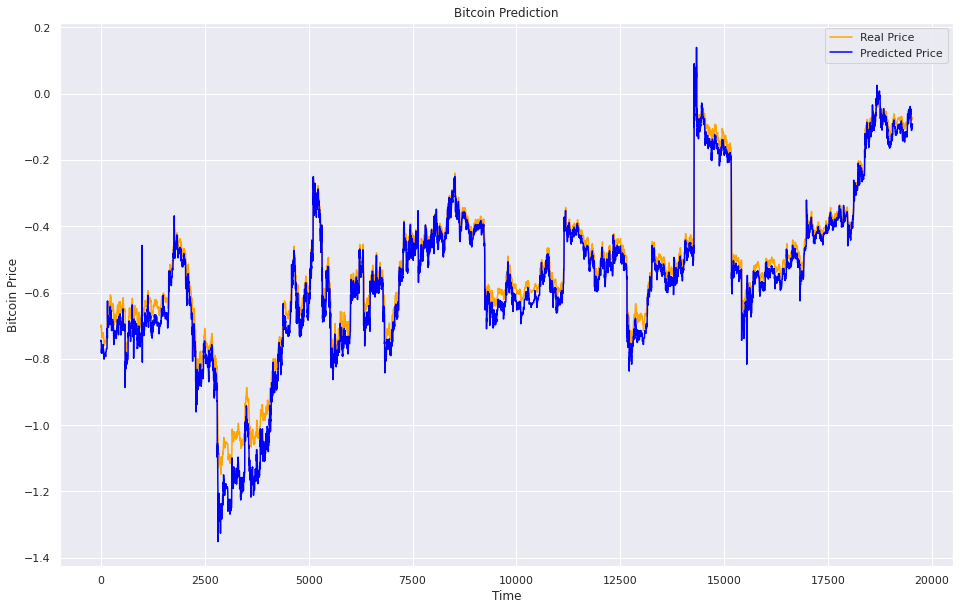

In [31]:
plt.figure(figsize=(16,10))

plt.plot(output_prediction, color = 'orange', label = 'Real Price')
plt.plot(y_Rnn_test, color = 'blue', label = 'Predicted Price')

plt.title('Bitcoin Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')

plt.legend()
plt.show()

In [32]:
Rnn_model.evaluate(X_Rnn_train, y_Rnn_train)

2443/2443 [==============================] - 12s 5ms/step - loss: 0.0032 - accuracy: 0.0000e+00


[0.0031807885970920324, 0.0]

In [33]:
Rnn_model.evaluate(X_Rnn_test,y_Rnn_test)

611/611 [==============================] - 3s 5ms/step - loss: 0.0023 - accuracy: 0.0000e+00


[0.0022749893832951784, 0.0]